### Data Loading and Initial Exploration

In this section, we load the preprocessed dataset and perform an initial exploration of the data.

In [36]:
import pandas as pd
import numpy as np

file1 = pd.read_csv('data/msn_02_fuel_leak_signals_preprocessed.csv', sep=';')


### Inspecting the Dataset

We inspect the columns of the dataset to understand its structure.

In [37]:
file1.columns

Index(['UTC_TIME', 'MSN', 'Flight', 'ENGINE_RUNNING_1', 'ENGINE_RUNNING_2',
       'ENGINE_RUNNING_3', 'ENGINE_RUNNING_4', 'FLIGHT_PHASE_COUNT',
       'FUEL_FLOW_1', 'FUEL_FLOW_2',
       ...
       'STATE_FUEL_QTY_ACCURACY_LST_DEGRADED',
       'STATE_FUEL_QTY_ACCURACY_RST_DEGRADED',
       'STATUS_FUEL_QTY_PART_UNUSABLE_LST',
       'STATUS_FUEL_QTY_PART_UNUSABLE_RST', 'STATUS_FUEL_QTY_UNUSABLE_LST',
       'STATUS_FUEL_QTY_UNUSABLE_RST', 'STATUS_OVERFLOW_LST',
       'STATUS_OVERFLOW_RST', 'VALUE_FUEL_VOL_LST', 'VALUE_FUEL_VOL_RST'],
      dtype='object', length=111)

### Selecting Relevant Columns

We select relevant columns from the dataset for further analysis.

In [38]:
#only keeping the columns that I think could be interesting
file1 = file1[['UTC_TIME', 'MSN', 'Flight','FLIGHT_PHASE_COUNT','FUEL_USED_1','FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4', 'FW_GEO_ALTITUDE','VALUE_FOB', 'VALUE_FUEL_QTY_CC1',
       'VALUE_FUEL_QTY_CC2', 'VALUE_FUEL_QTY_CC3', 'VALUE_FUEL_QTY_CC4', 'VALUE_FUEL_QTY_CT', 'VALUE_FUEL_QTY_FT1', 'VALUE_FUEL_QTY_FT2', 
       'VALUE_FUEL_QTY_FT3', 'VALUE_FUEL_QTY_FT4', 'VALUE_FUEL_QTY_LXT', 'VALUE_FUEL_QTY_RXT']]

### Creating new columns

We create new columns in the dataset to enhance the analysis.

In [39]:
#create new column called total_fuel_used which is FUEL_USED_1 + FUEL_USED_2 + FUEL_USED_3 + FUEL_USED_4
file1['total_fuel_used'] = file1['FUEL_USED_1'] + file1['FUEL_USED_2'] + file1['FUEL_USED_3'] + file1['FUEL_USED_4']

file1['Fuel_On_board_tanks'] = file1['VALUE_FUEL_QTY_CC1'] + file1['VALUE_FUEL_QTY_CC2'] + file1['VALUE_FUEL_QTY_CC3'] + file1['VALUE_FUEL_QTY_CC4'] + file1['VALUE_FUEL_QTY_CT'] + file1['VALUE_FUEL_QTY_FT1'] + file1['VALUE_FUEL_QTY_FT2'] + file1['VALUE_FUEL_QTY_FT3'] + file1['VALUE_FUEL_QTY_FT4'] + file1['VALUE_FUEL_QTY_LXT'] + file1['VALUE_FUEL_QTY_RXT']

#plot (FOB - total_fuel_used) and Fuel_On_board_tanks for each flight
file1['FOB - total_fuel_used'] = file1['VALUE_FOB'] - file1['total_fuel_used']

#calculate 2 columns called fuel_used_per_minute_FOB and fuel_used_per_minute_total_fuel_used
file1['fuel_used_per_minute_FOB_diff'] = file1['VALUE_FOB'].diff()
file1['fuel_used_per_minute_total_fuel_used_diff'] = file1['total_fuel_used'].diff()

In [40]:
file1.head()

,UTC_TIME,MSN,Flight,FLIGHT_PHASE_COUNT,FUEL_USED_1,FUEL_USED_2,FUEL_USED_3,FUEL_USED_4,FW_GEO_ALTITUDE,VALUE_FOB,...,VALUE_FUEL_QTY_FT2,VALUE_FUEL_QTY_FT3,VALUE_FUEL_QTY_FT4,VALUE_FUEL_QTY_LXT,VALUE_FUEL_QTY_RXT,total_fuel_used,Fuel_On_board_tanks,FOB - total_fuel_used,fuel_used_per_minute_FOB_diff,fuel_used_per_minute_total_fuel_used_diff
0,2011-03-09 12:06:01,A400M-0002,V0136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-03-09 12:06:02,A400M-0002,V0136,1.0,0.0,0.0,0.0,0.0,272.000,26988.0,...,2509.0,2591.0,1966.0,8951.0,8999.0,0.0,28232.0,26988.0,NaN,NaN
2,2011-03-09 12:06:03,A400M-0002,V0136,1.0,0.0,0.0,0.0,0.0,271.625,26988.0,...,2509.0,2591.0,1966.0,8951.0,8999.0,0.0,28232.0,26988.0,0.0,0.0
3,2011-03-09 12:06:04,A400M-0002,V0136,1.0,0.0,0.0,0.0,0.0,272.000,26988.0,...,2509.0,2591.0,1966.0,8951.0,8999.0,0.0,28232.0,26988.0,0.0,0.0
4,2011-03-09 12:06:05,A400M-0002,V0136,1.0,0.0,0.0,0.0,0.0,272.125,26988.0,...,2509.0,2591.0,1966.0,8951.0,8999.0,0.0,28232.0,26988.0,0.0,0.0


In [41]:
file1.isna().sum()

UTC_TIME                                          0
MSN                                               0
Flight                                            0
FLIGHT_PHASE_COUNT                            62922
FUEL_USED_1                                  108636
FUEL_USED_2                                  106980
FUEL_USED_3                                  106979
FUEL_USED_4                                  108867
FW_GEO_ALTITUDE                               62875
VALUE_FOB                                     63258
VALUE_FUEL_QTY_CC1                            63293
VALUE_FUEL_QTY_CC2                            63293
VALUE_FUEL_QTY_CC3                            63293
VALUE_FUEL_QTY_CC4                            63293
VALUE_FUEL_QTY_CT                             62976
VALUE_FUEL_QTY_FT1                            62970
VALUE_FUEL_QTY_FT2                            62971
VALUE_FUEL_QTY_FT3                            62970
VALUE_FUEL_QTY_FT4                            62973
VALUE_FUEL_Q

### Dropping all NA values to focus on what we have

In [42]:
file1.dropna(inplace=True)

In [43]:
#creating a column called cummalitive_fuel_used which is the cummulative sum of total_fuel_used
file1['cummalitive_fuel_used'] = file1['total_fuel_used'].cumsum()


In [44]:
#creating a new column that is called initial_FOB which is the first value of VALUE_FOB for each flight
file1['initial_FOB'] = file1.groupby('Flight')['VALUE_FOB'].transform('first')

In [45]:
file1.head()

,UTC_TIME,MSN,Flight,FLIGHT_PHASE_COUNT,FUEL_USED_1,FUEL_USED_2,FUEL_USED_3,FUEL_USED_4,FW_GEO_ALTITUDE,VALUE_FOB,...,VALUE_FUEL_QTY_FT4,VALUE_FUEL_QTY_LXT,VALUE_FUEL_QTY_RXT,total_fuel_used,Fuel_On_board_tanks,FOB - total_fuel_used,fuel_used_per_minute_FOB_diff,fuel_used_per_minute_total_fuel_used_diff,cummalitive_fuel_used,initial_FOB
2,2011-03-09 12:06:03,A400M-0002,V0136,1.0,0.0,0.0,0.0,0.0,271.625,26988.0,...,1966.0,8951.0,8999.0,0.0,28232.0,26988.0,0.0,0.0,0.0,26988.0
3,2011-03-09 12:06:04,A400M-0002,V0136,1.0,0.0,0.0,0.0,0.0,272.000,26988.0,...,1966.0,8951.0,8999.0,0.0,28232.0,26988.0,0.0,0.0,0.0,26988.0
4,2011-03-09 12:06:05,A400M-0002,V0136,1.0,0.0,0.0,0.0,0.0,272.125,26988.0,...,1966.0,8951.0,8999.0,0.0,28232.0,26988.0,0.0,0.0,0.0,26988.0
5,2011-03-09 12:06:06,A400M-0002,V0136,1.0,0.0,0.0,0.0,0.0,272.125,26988.0,...,1966.0,8951.0,8999.0,0.0,28232.0,26988.0,0.0,0.0,0.0,26988.0
6,2011-03-09 12:06:07,A400M-0002,V0136,1.0,0.0,0.0,0.0,0.0,272.125,26988.0,...,1966.0,8951.0,8999.0,0.0,28232.0,26988.0,0.0,0.0,0.0,26988.0


In [46]:
#new column called fuel_used+FOB which is the sum of total_fuel_used and VALUE_FOB
file1['fuel_used+FOB'] = file1['total_fuel_used'] + file1['VALUE_FOB']

### Plotting the initial FOB which is the straight line and then the fuel_used+FOB. The two lines should ideally be the exacy same

Additionally the colour shows what flight phase its in

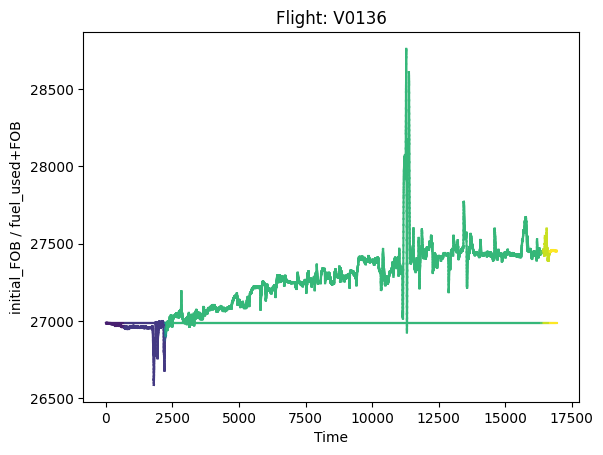

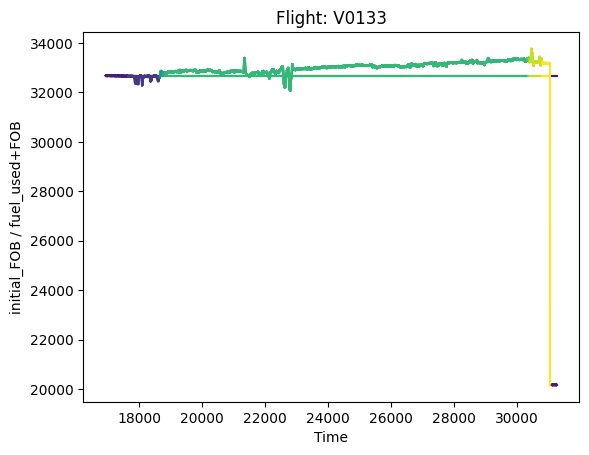

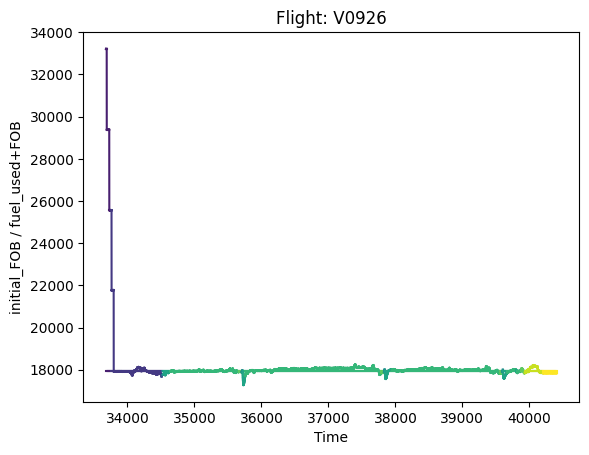

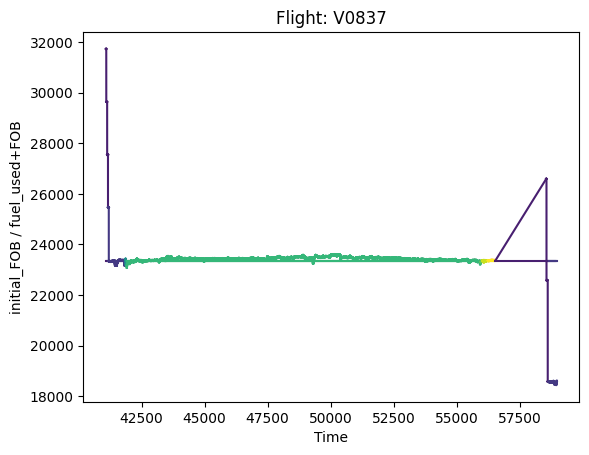

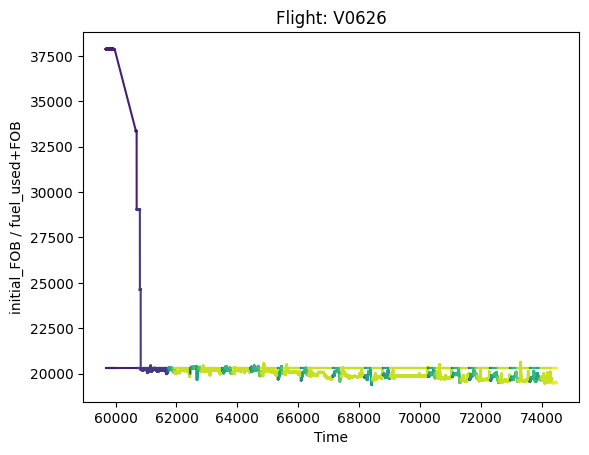

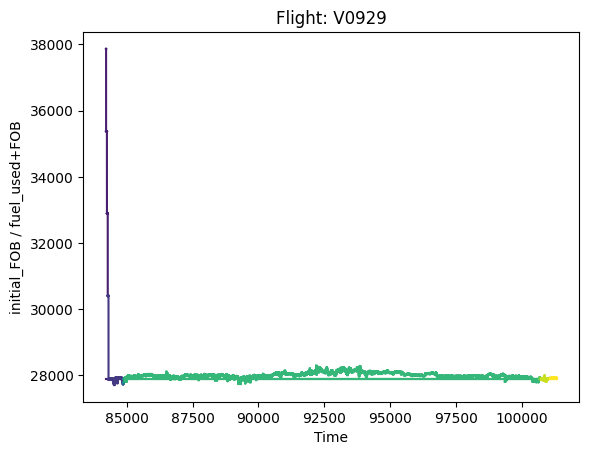

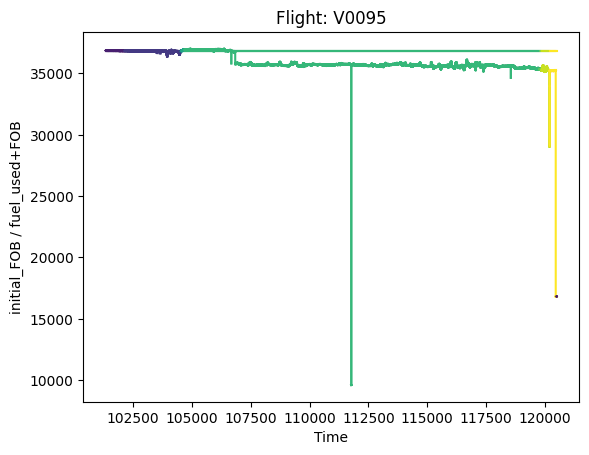

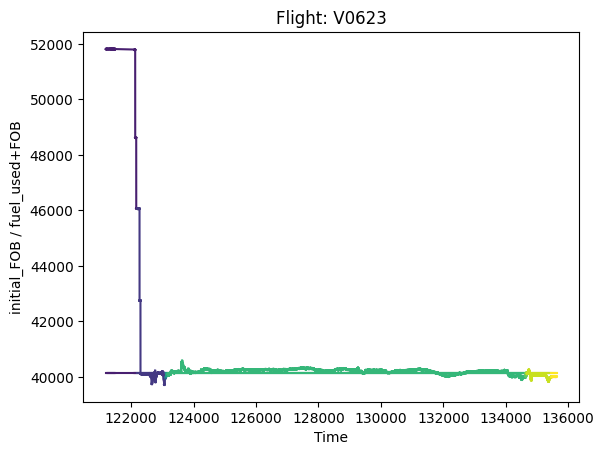

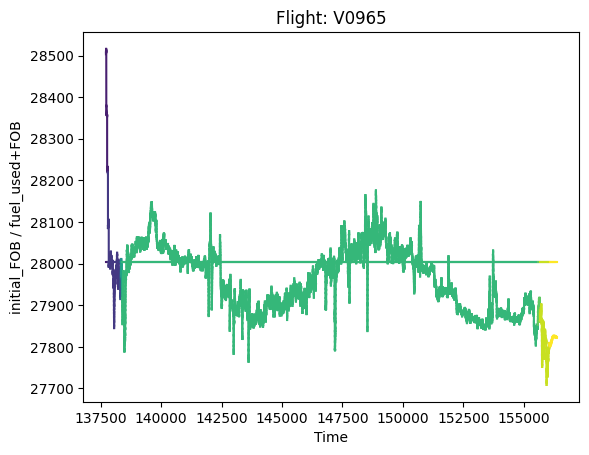

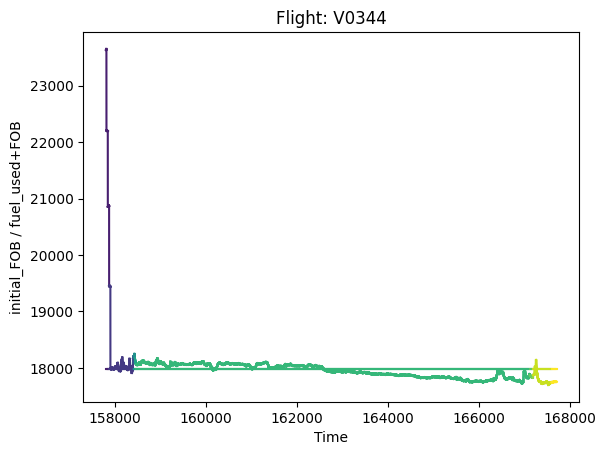

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique flights
unique_flights = file1['Flight'].unique()

# Initialize counter
counter = 0

# For each unique flight
for flight in unique_flights:
    # If counter is 10, break the loop
    if counter == 10:
        break

    # Filter data for that flight
    flight_data = file1[file1['Flight'] == flight]
    
    # Create a new figure
    plt.figure()
    
    # For each row in the flight data
    for i in range(1, len(flight_data)):
        # Plot a line segment from the current row to the next row for 'initial_FOB'
        plt.plot(flight_data.index[i-1:i+1], flight_data['initial_FOB'].iloc[i-1:i+1], color=plt.cm.viridis(flight_data['FLIGHT_PHASE_COUNT'].iloc[i]/flight_data['FLIGHT_PHASE_COUNT'].max()))
        
        # Plot a line segment from the current row to the next row for 'fuel_used+FOB'
        plt.plot(flight_data.index[i-1:i+1], flight_data['fuel_used+FOB'].iloc[i-1:i+1], color=plt.cm.viridis(flight_data['FLIGHT_PHASE_COUNT'].iloc[i]/flight_data['FLIGHT_PHASE_COUNT'].max()))
    
    # Set the title to the flight number
    plt.title(f'Flight: {flight}')
    plt.xlabel('Time')
    plt.ylabel('initial_FOB / fuel_used+FOB')
    plt.show()  # Show the plot

    # Increment counter
    counter += 1


# Now looking at real data from the non test flight to see if it is the same trend

In [48]:
file6 = pd.read_csv('data/msn_29_fuel_leak_signals_preprocessed.csv', sep=';')

In [49]:
file6.head()

,UTC_TIME,FUEL_USED_2,FUEL_USED_3,FUEL_USED_4,FW_GEO_ALTITUDE,VALUE_FOB,VALUE_FUEL_QTY_CT,VALUE_FUEL_QTY_FT1,VALUE_FUEL_QTY_FT2,VALUE_FUEL_QTY_FT3,VALUE_FUEL_QTY_FT4,VALUE_FUEL_QTY_LXT,VALUE_FUEL_QTY_RXT,FLIGHT_PHASE_COUNT,FUEL_USED_1,Flight,MSN
0,2014-07-24 07:04:35,682.630615,663.887573,641.243591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.553467,0.0,F-RBAC
1,2014-07-24 07:04:36,682.630615,663.887573,641.243591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.553467,0.0,F-RBAC
2,2014-07-24 07:04:37,682.630615,663.887573,641.243591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.553467,0.0,F-RBAC
3,2014-07-24 07:04:38,682.630615,663.887573,641.243591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.553467,0.0,F-RBAC
4,2014-07-24 07:04:39,682.630615,663.887573,641.243591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.553467,0.0,F-RBAC


In [50]:
#create new column called total_fuel_used which is FUEL_USED_1 + FUEL_USED_2 + FUEL_USED_3 + FUEL_USED_4
file6['total_fuel_used'] = file6['FUEL_USED_1'] + file6['FUEL_USED_2'] + file6['FUEL_USED_3'] + file6['FUEL_USED_4']

file6['Fuel_On_board_tanks'] = file6['VALUE_FUEL_QTY_CT'] + file6['VALUE_FUEL_QTY_FT1'] + file6['VALUE_FUEL_QTY_FT2'] + file6['VALUE_FUEL_QTY_FT3'] + file6['VALUE_FUEL_QTY_FT4'] + file6['VALUE_FUEL_QTY_LXT'] + file6['VALUE_FUEL_QTY_RXT']

#plot (FOB - total_fuel_used) and Fuel_On_board_tanks for each flight
file6['FOB - total_fuel_used'] = file6['VALUE_FOB'] - file6['total_fuel_used']

#calculate 2 columns called fuel_used_per_minute_FOB and fuel_used_per_minute_total_fuel_used
file6['fuel_used_per_minute_FOB_diff'] = file6['VALUE_FOB'].diff()
file6['fuel_used_per_minute_total_fuel_used_diff'] = file6['total_fuel_used'].diff()

In [51]:
file6.dropna(inplace=True)

In [52]:
file6.shape

(49926, 22)

In [53]:
#creating a column called cummalitive_fuel_used which is the cummulative sum of total_fuel_used
file6['cummalitive_fuel_used'] = file6['total_fuel_used'].cumsum()

In [54]:
#creating a new column that is called initial_FOB which is the first value of VALUE_FOB for each flight
file6['initial_FOB'] = file6.groupby('Flight')['VALUE_FOB'].transform('first')

In [55]:
#new column called fuel_used+FOB which is the sum of total_fuel_used and VALUE_FOB
file6['fuel_used+FOB'] = file6['total_fuel_used'] + file6['VALUE_FOB']

### Again graphing the initial Fuel Onboard and fuel_used + FOB for the first 10 flights. Additionally with the altitude.

Altitude is the red line.
The straight line is the initial fob and the other line is FOB + total fuel used.
Colour is flight phase

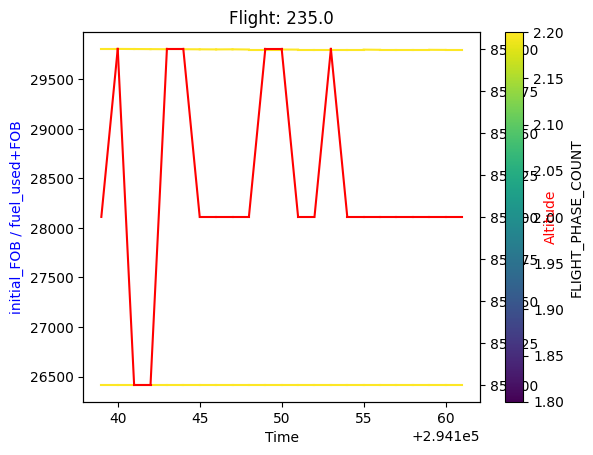

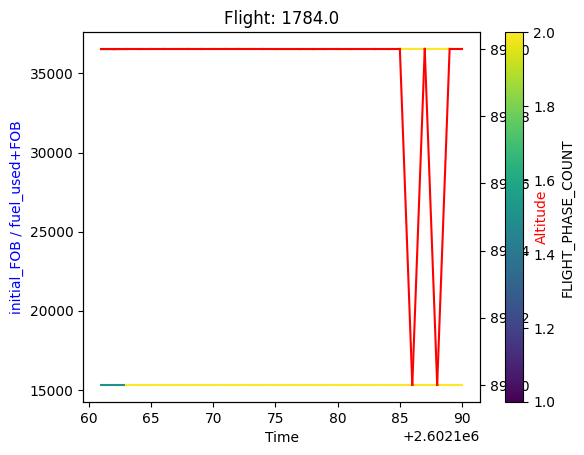

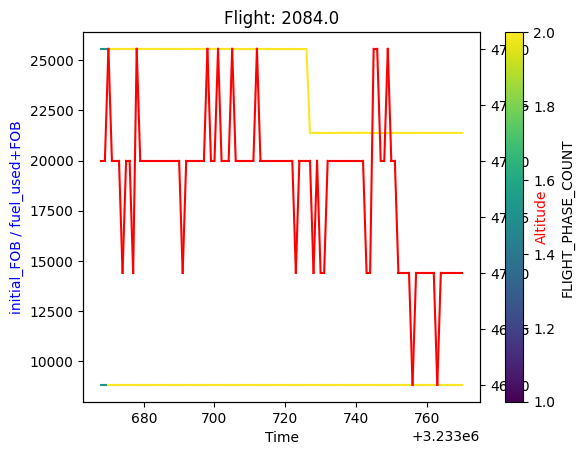

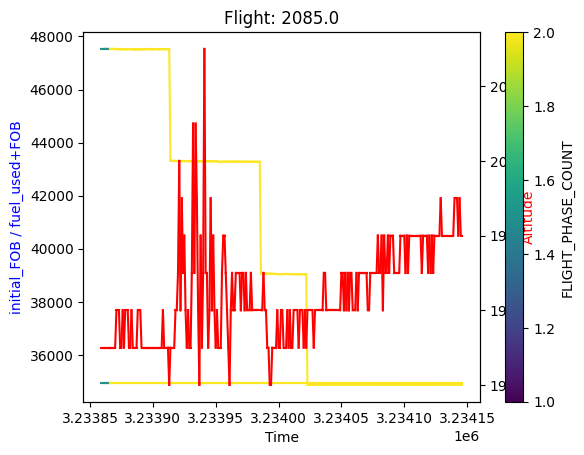

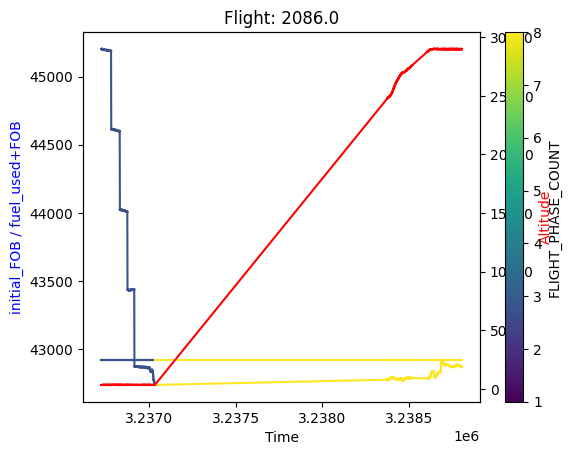

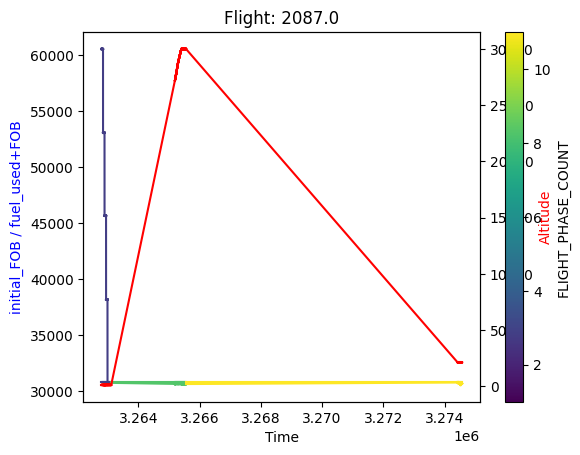

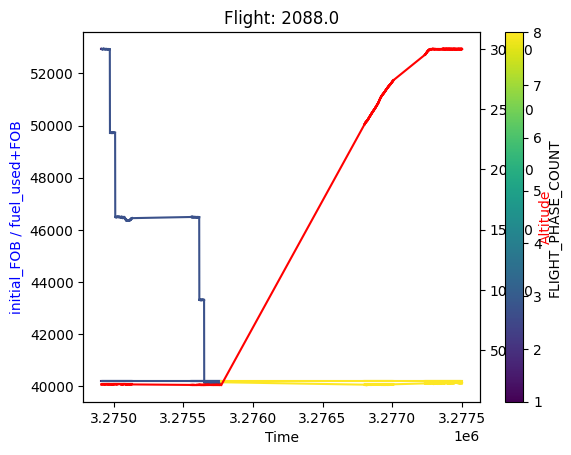

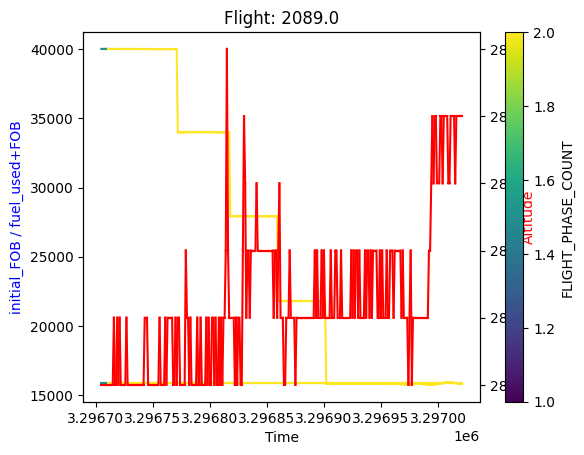

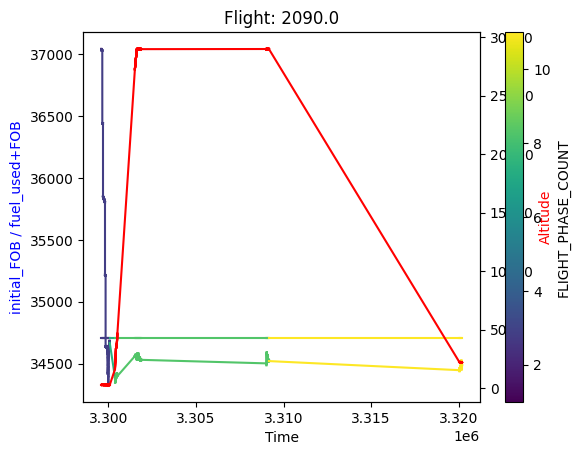

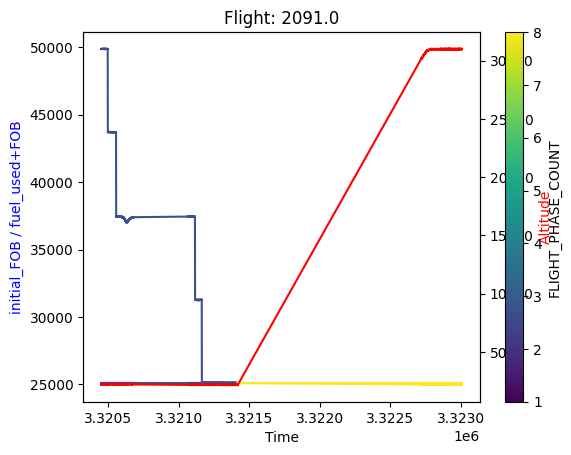

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique flights
unique_flights = file6['Flight'].unique()

# Initialize counter
counter = 0

# For each unique flight
for flight in unique_flights:
    # If counter is 10, break the loop
    if counter == 10:
        break

    # Filter data for that flight
    flight_data = file6[file6['Flight'] == flight]
    
    # Create a new figure and add a second y-axis
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    
    # Create a ScalarMappable object for the colorbar
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=flight_data['FLIGHT_PHASE_COUNT'].min(), vmax=flight_data['FLIGHT_PHASE_COUNT'].max()))
    sm.set_array([])
    
    # For each row in the flight data
    for i in range(1, len(flight_data)):
        # Plot a line segment from the current row to the next row for 'initial_FOB'
        ax1.plot(flight_data.index[i-1:i+1], flight_data['initial_FOB'].iloc[i-1:i+1], color=plt.cm.viridis(flight_data['FLIGHT_PHASE_COUNT'].iloc[i]/flight_data['FLIGHT_PHASE_COUNT'].max()))
        
        # Plot a line segment from the current row to the next row for 'fuel_used+FOB'
        ax1.plot(flight_data.index[i-1:i+1], flight_data['fuel_used+FOB'].iloc[i-1:i+1], color=plt.cm.viridis(flight_data['FLIGHT_PHASE_COUNT'].iloc[i]/flight_data['FLIGHT_PHASE_COUNT'].max()))
        
        # Plot a line segment from the current row to the next row for 'Altitude' on the second y-axis
        ax2.plot(flight_data.index[i-1:i+1], flight_data['FW_GEO_ALTITUDE'].iloc[i-1:i+1], color='red')
    
    # Set the title to the flight number
    plt.title(f'Flight: {flight}')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('initial_FOB / fuel_used+FOB', color='blue')
    ax2.set_ylabel('Altitude', color='red')
    
    # Add the colorbar to the figure
    fig.colorbar(sm, ax=ax1, orientation='vertical', label='FLIGHT_PHASE_COUNT')
    
    plt.show()  # Show the plot

    # Increment counter
    counter += 1

### Graphing the altitude of the airplanes by the flight phase

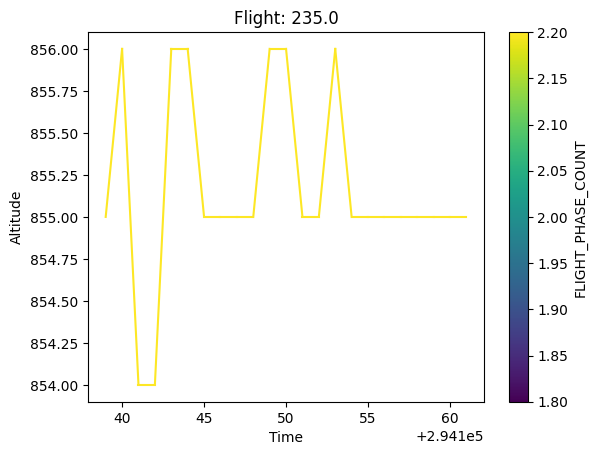

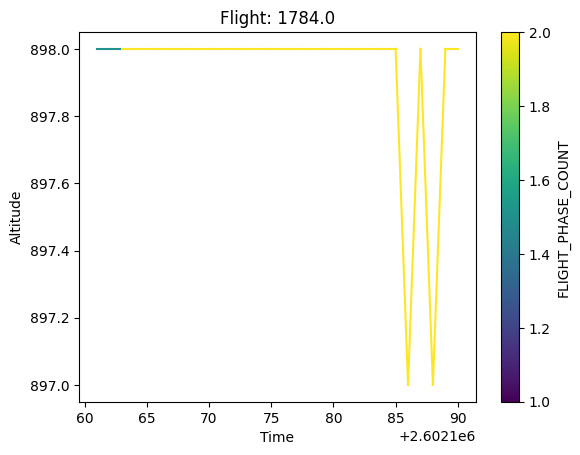

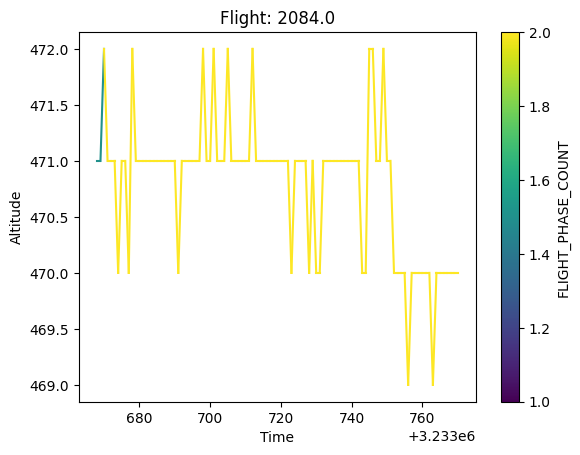

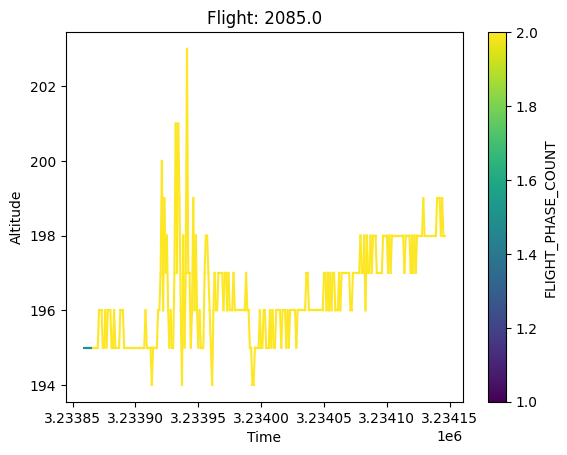

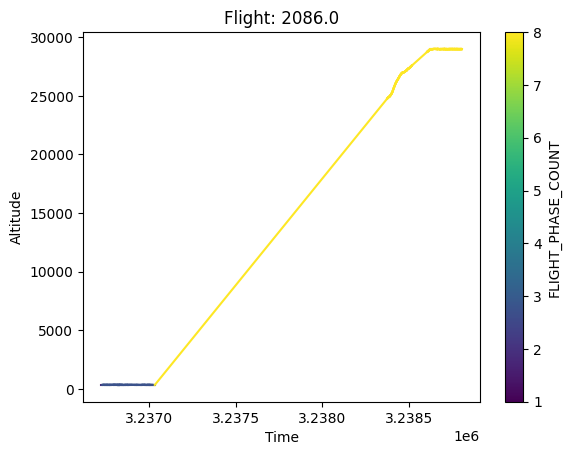

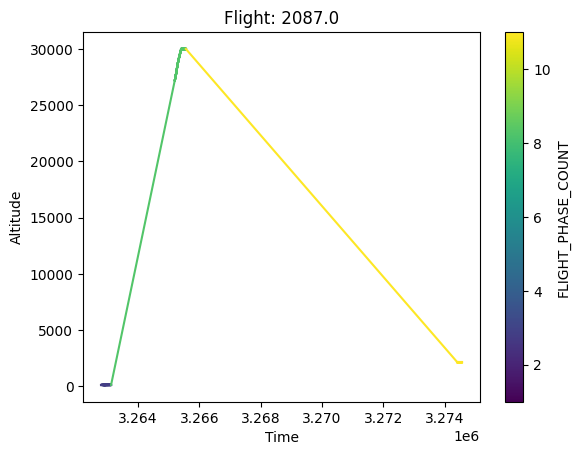

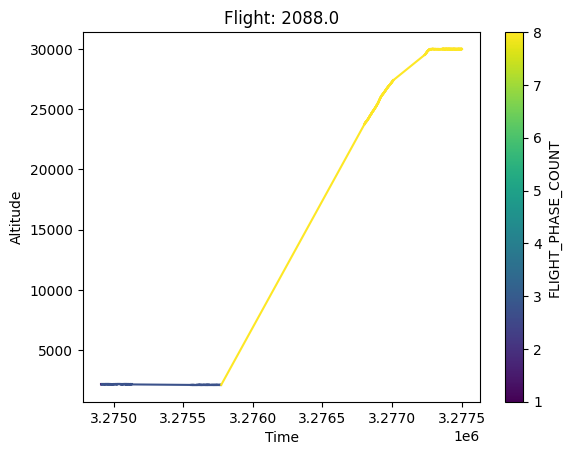

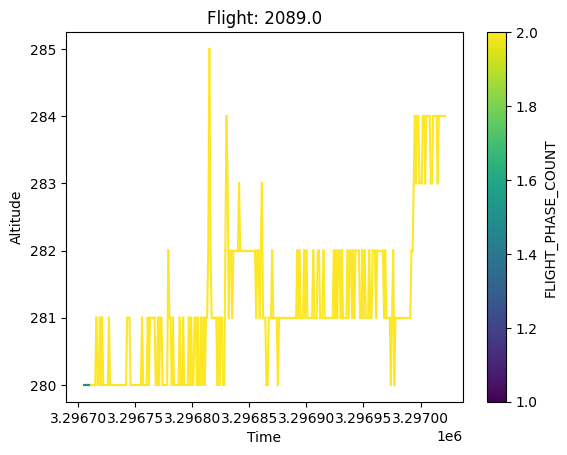

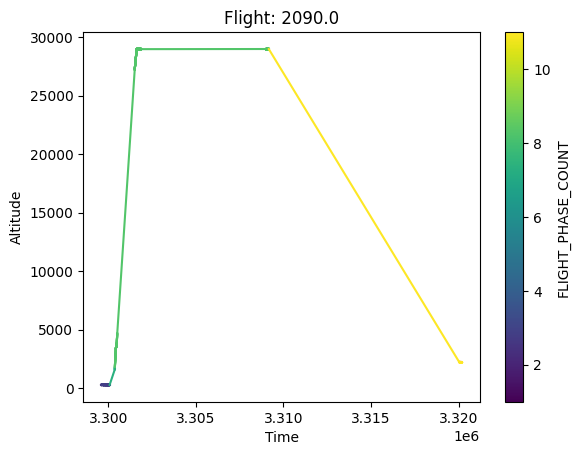

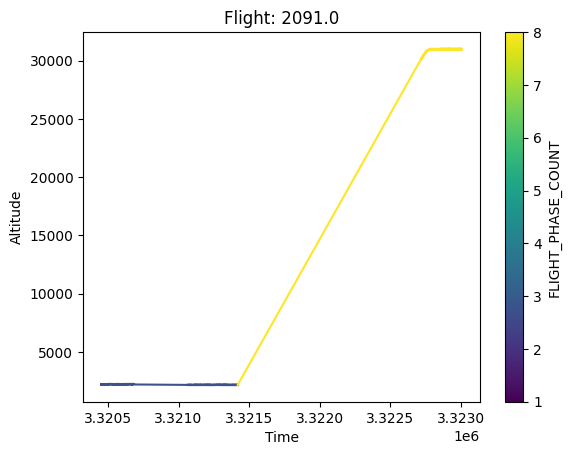

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique flights
unique_flights = file6['Flight'].unique()

# Initialize counter
counter = 0

# For each unique flight
for flight in unique_flights:
    # If counter is 10, break the loop
    if counter == 10:
        break

    # Filter data for that flight
    flight_data = file6[file6['Flight'] == flight]
    
    # Create a new figure
    fig, ax = plt.subplots()
    
    # For each row in the flight data
    for i in range(1, len(flight_data)):
        # Plot a line segment from the current row to the next row for 'Altitude'
        sc = ax.plot(flight_data.index[i-1:i+1], flight_data['FW_GEO_ALTITUDE'].iloc[i-1:i+1], color=plt.cm.viridis(flight_data['FLIGHT_PHASE_COUNT'].iloc[i]/flight_data['FLIGHT_PHASE_COUNT'].max()))
    
    # Set the title to the flight number
    ax.set_title(f'Flight: {flight}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Altitude')
    
    # Create a colorbar
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=flight_data['FLIGHT_PHASE_COUNT'].min(), vmax=flight_data['FLIGHT_PHASE_COUNT'].max()))
    sm.set_array([])
    fig.colorbar(sm, ax=ax, orientation='vertical', label='FLIGHT_PHASE_COUNT')
    
    plt.show()  # Show the plot

    # Increment counter
    counter += 1

In [58]:
file6['diff_initial_FOB_fuel_used+FOB'] = file6['initial_FOB'] - file6['fuel_used+FOB']


### Now graphing the difference between initial_FOB and fuel_used + FOB for each flight. Ideally the line would be at 0 Additionally I still have the altitude as the red line.

/var/folders/6g/x5lm6rt15m9bd1llv55ld0_h0000gn/T/ipykernel_4285/2203527780.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 8)


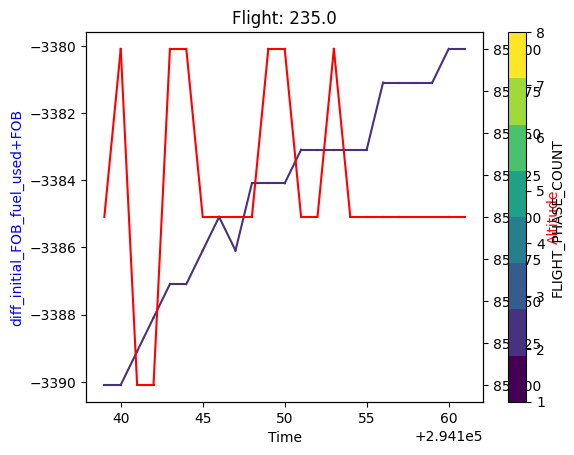

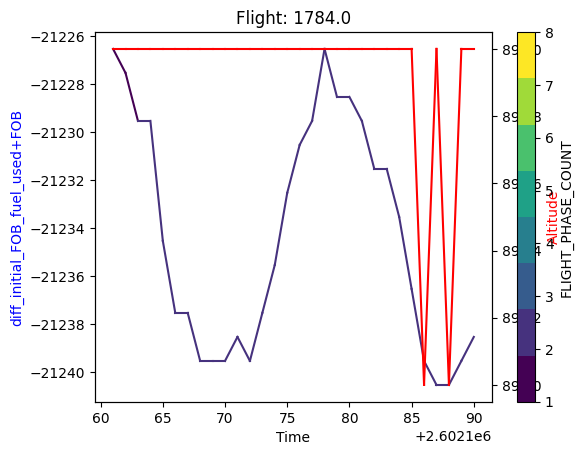

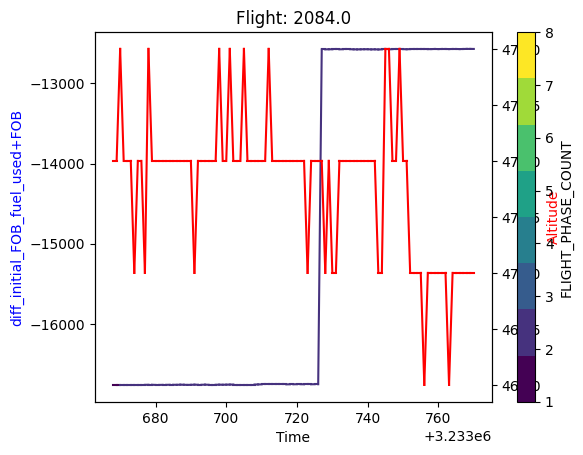

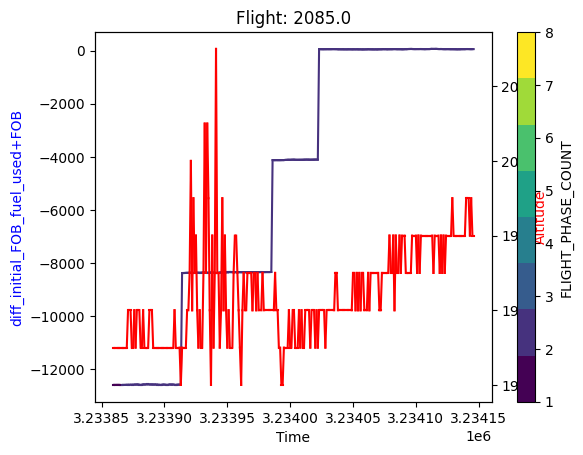

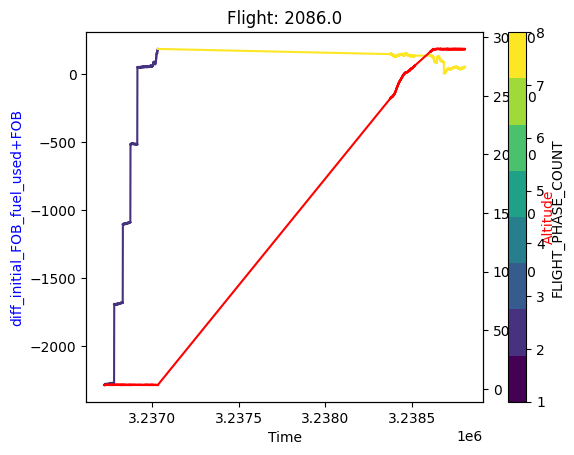

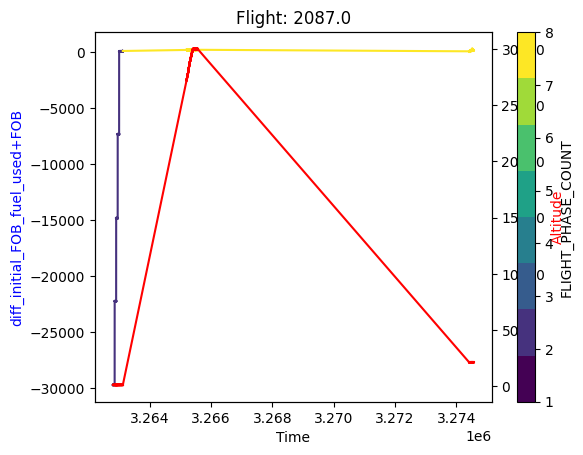

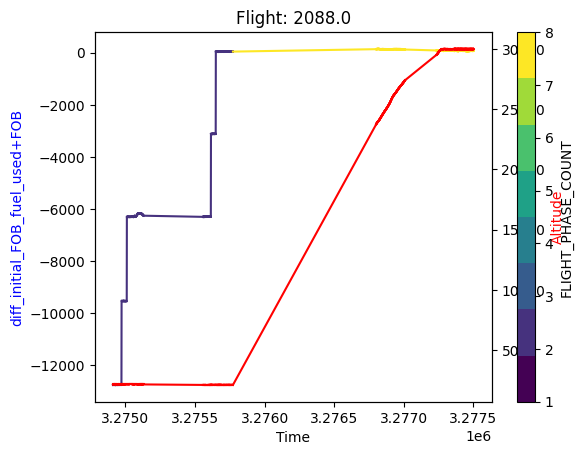

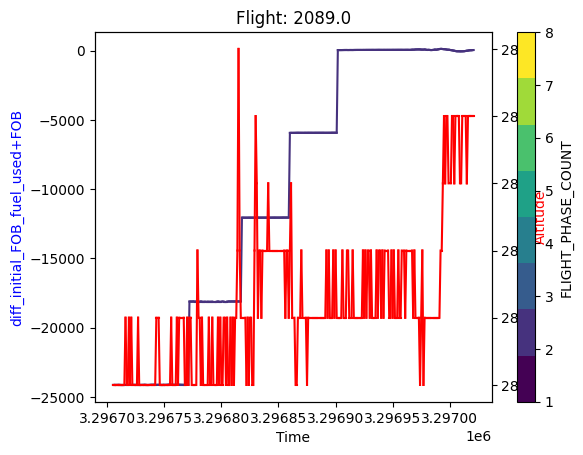

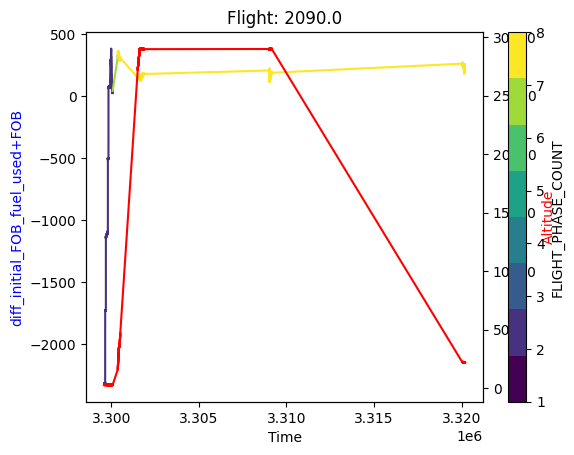

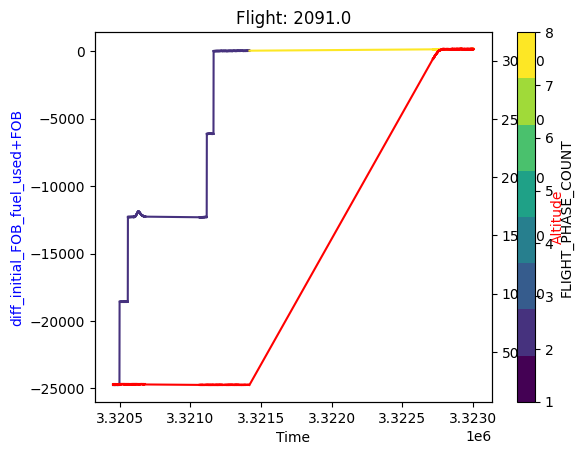

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique flights
unique_flights = file6['Flight'].unique()

# Define a colormap with a fixed range for flight phases (assuming phases range from 1 to 8)
cmap = plt.cm.get_cmap('viridis', 8)
norm = plt.Normalize(vmin=1, vmax=8)

# Initialize counter
counter = 0

# For each unique flight
for flight in unique_flights:
    # If counter is 10, break the loop
    if counter == 10:
        break

    # Filter data for that flight
    flight_data = file6[file6['Flight'] == flight]
    
    # Create a new figure and add a second y-axis
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    
    # For each row in the flight data
    for i in range(1, len(flight_data)):
        # Plot a line segment from the current row to the next row for 'diff_initial_FOB_fuel_used+FOB'
        color = cmap(norm(flight_data['FLIGHT_PHASE_COUNT'].iloc[i]))
        ax1.plot(flight_data.index[i-1:i+1], flight_data['diff_initial_FOB_fuel_used+FOB'].iloc[i-1:i+1], color=color)
        
        # Plot a line segment from the current row to the next row for 'Altitude' on the second y-axis
        ax2.plot(flight_data.index[i-1:i+1], flight_data['FW_GEO_ALTITUDE'].iloc[i-1:i+1], color='red')
    
    # Set the title to the flight number
    plt.title(f'Flight: {flight}')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('diff_initial_FOB_fuel_used+FOB', color='blue')
    ax2.set_ylabel('Altitude', color='red')
    
    # Add the colorbar to the figure
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=ax1, orientation='vertical', label='FLIGHT_PHASE_COUNT')
    
    plt.show()  # Show the plot

    # Increment counter
    counter += 1

In [60]:
#calculating the average diff_initial_FOB_fuel_used+FOB for each flight phase
file6.groupby('FLIGHT_PHASE_COUNT')['diff_initial_FOB_fuel_used+FOB'].mean()

FLIGHT_PHASE_COUNT
1.0    -9874.759557
2.0    -4225.314128
6.0      113.933612
7.0      189.576688
8.0      122.795408
11.0     108.727319
12.0      12.171692
Name: diff_initial_FOB_fuel_used+FOB, dtype: float64

In [61]:
file6['alititude_diff'] = file6['FW_GEO_ALTITUDE'].diff()

In [62]:
file6.groupby('FLIGHT_PHASE_COUNT')['alititude_diff'].mean()

FLIGHT_PHASE_COUNT
1.0    -899.255278
2.0      -5.247633
6.0      42.750000
7.0      65.961240
8.0      72.598331
11.0   -116.238959
12.0     -2.000000
Name: alititude_diff, dtype: float64

In [63]:
file6.groupby('FLIGHT_PHASE_COUNT')['alititude_diff'].count()

FLIGHT_PHASE_COUNT
1.0       521
2.0     36974
6.0         8
7.0       129
8.0     11024
11.0     1268
12.0        1
Name: alititude_diff, dtype: int64

In [73]:
file1.dtypes

ENGINE_RUNNING_1                   bool
ENGINE_RUNNING_2                   bool
ENGINE_RUNNING_3                   bool
ENGINE_RUNNING_4                   bool
FLIGHT_PHASE_COUNT              float64
                                 ...   
STATUS_FUEL_QTY_UNUSABLE_RST    float64
STATUS_OVERFLOW_LST             float64
STATUS_OVERFLOW_RST             float64
VALUE_FUEL_VOL_LST              float64
VALUE_FUEL_VOL_RST              float64
Length: 108, dtype: object

In [71]:
file1 = pd.read_csv('data/msn_02_fuel_leak_signals_preprocessed.csv', sep=';')

In [74]:
#keep only the float and int columns
file1 = file1.select_dtypes(include=['float64', 'int64'])

In [76]:
file1 = file1.dropna()

In [79]:
file1.shape

(29905, 49)

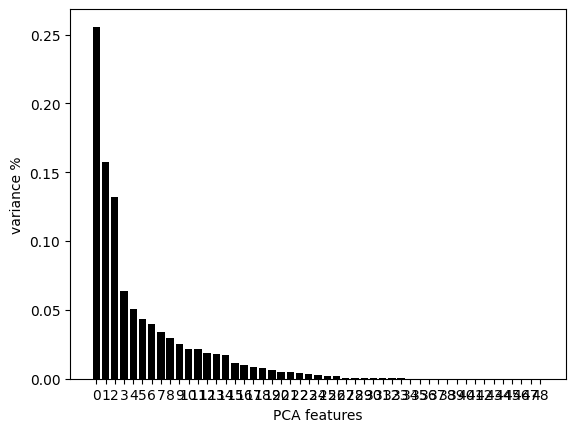

In [77]:
#running a PCA on the data to reduce the number of variables
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#file1.drop(['UTC_TIME','MSN', 'Flight'], axis=1, inplace=True)
# Define the features
X = file1.columns

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(file1)

# Create a PCA instance
pca = PCA()

# Fit the standardized data to the pca
pca.fit(X_scaled)

# Plot the explained variances
plt.figure()

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()


In [80]:
#keep only the first 4 components
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X_scaled)

<Axes: >

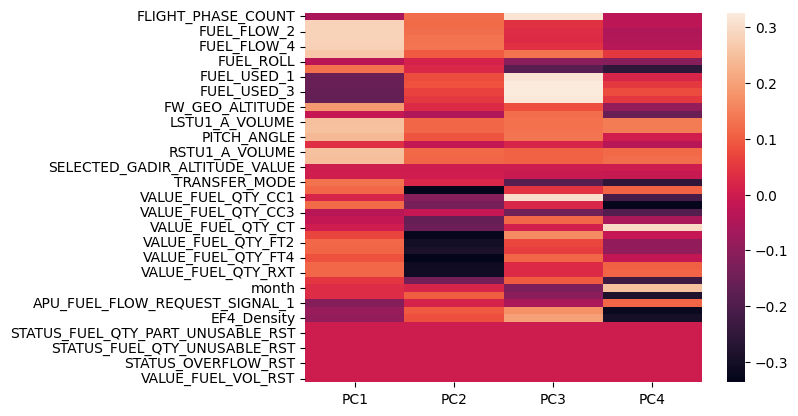

In [81]:
import seaborn as sns
import pandas as pd

# Assuming `pca` is your fitted PCA object and `df` is your original DataFrame
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=file1.columns)
sns.heatmap(loadings)

<Axes: >

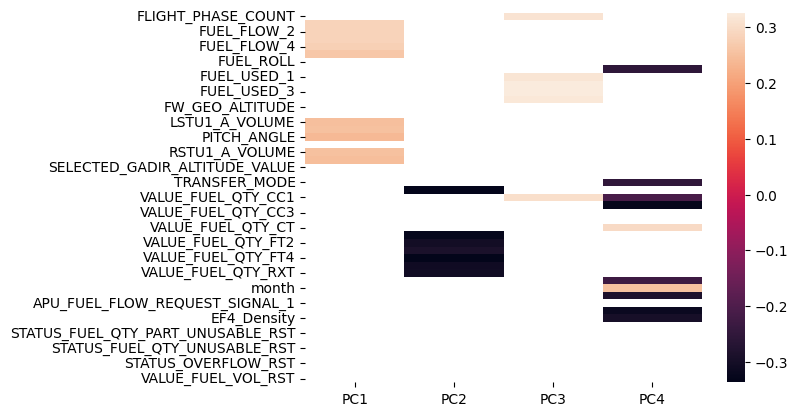

In [82]:
# Create a mask for values with absolute value above 0.2
mask = loadings.abs() > 0.2

# Apply the mask to the loadings DataFrame
filtered_loadings = loadings[mask]

# Plot the heatmap with the filtered loadings
sns.heatmap(filtered_loadings)